# Module 6
## Clustering for Diversification analysis
Clustering is a method of unsupervised learning and is a common technique for statistical data
analysis used in many fields.
Clustering is a Machine Learning technique that involves the grouping of data points. Given a
set of data points, we can use a clustering algorithm to classify each data point into a specific
group. In theory, data points that are in the same group should have similar properties and/or
features, while data points in different groups should have highly dissimilar properties and/or
features.
In financial Markets, Cluster analysis is a technique used to group sets of objects that share
similar characteristics. It is common in statistics, but investors will use the approach to build a
diversified portfolio. Stocks that exhibit high correlations in returns fall into one basket, those
slightly less correlated in another, and so on, until each stock is placed into a category.

# Query 6.1
Create a table/data frame with the closing prices of 30 different stocks, with 10 from each of the caps

In [3]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

gr = pd.DataFrame()
manapuram = pd.read_csv('30 stocks/smallcaps/manapuram_stock_data.csv')
gr['Manapuram'] = manapuram['Close Price']
program = pd.read_csv('30 stocks/smallcaps/progam_stock_data.csv')
gr['Program'] = program['Close Price']
ramcos = pd.read_csv('30 stocks/smallcaps/ramcos_stock_data.csv')
gr['Ramcos'] = ramcos['Close Price']
sunteck = pd.read_csv('30 stocks/smallcaps/sunteck_stock_data.csv')
gr['Sunteck'] = sunteck['Close Price']
time_techno = pd.read_csv('30 stocks/smallcaps/time_techno_stock_data.csv')
gr['Time_Techno'] = time_techno['Close Price']
welcorp = pd.read_csv('30 stocks/smallcaps/welcorp_stock_data.csv')
gr['Welcorp'] = welcorp['Close Price']
yes_bank = pd.read_csv('30 stocks/smallcaps/yes_bank_stock_data.csv')
gr['Yes_Bank'] = yes_bank['Close Price']
airtel = pd.read_csv('30 stocks/largecaps/bharti_airtel_stock_data.csv')
gr['Airtel'] = airtel['Close Price']
bhel = pd.read_csv('30 stocks/largecaps/bhel_stock_data.csv')
gr['Bhel'] = bhel['Close Price']
cadila = pd.read_csv('30 stocks/largecaps/cadila_stock_data.csv')
gr['Cadila'] = cadila['Close Price']
dlf = pd.read_csv('30 stocks/largecaps/dlf_stock_data.csv')
gr['DLF'] = dlf['Close Price']
hdfc = pd.read_csv('30 stocks/largecaps/hdfc_stock_data.csv')
gr['Hdfc'] = hdfc['Close Price']
hdnzinc = pd.read_csv('30 stocks/largecaps/hdnzinc_stock_data.csv')
gr['hdnzinc'] = hdnzinc['Close Price']
IDEA = pd.read_csv('30 stocks/largecaps/IDEA_stock_data.csv')
gr['IDEA'] = IDEA['Close Price']
msm = pd.read_csv('30 stocks/largecaps/msm_stock_data.csv')
gr['Msm'] = msm['Close Price']
piramal = pd.read_csv('30 stocks/largecaps/piramal_stock_data.csv')
gr['Piramal'] = piramal['Close Price']
ultracemo = pd.read_csv('30 stocks/largecaps/ultracemo_stock_data.csv')
gr['ultracemo'] = ultracemo['Close Price']
boi = pd.read_csv('30 stocks/midcaps/boi_stock_data.csv')
gr['Boi'] = boi['Close Price']
dishtv = pd.read_csv('30 stocks/midcaps/dishtv_stock_data.csv')
gr['Dishtv'] = dishtv['Close Price']
escorts = pd.read_csv('30 stocks/midcaps/escorts_stock_data.csv')
gr['Escorts'] = escorts['Close Price']
godrej = pd.read_csv('30 stocks/midcaps/godrej_stock_data.csv')
gr['godrej'] = godrej['Close Price']
gujgas = pd.read_csv('30 stocks/midcaps/gujgas_stock_data.csv')
gr['Gujgas'] = gujgas['Close Price']
pageinds = pd.read_csv('30 stocks/midcaps/pageinds_stock_data.csv')
gr['Pageinds'] = pageinds['Close Price']
supreme = pd.read_csv('30 stocks/midcaps/supreme_stock_data.csv')
gr['Supreme'] = supreme['Close Price']
tatacomm = pd.read_csv('30 stocks/midcaps/tatacomm_stock_data.csv')
gr['Tatacomm'] = tatacomm['Close Price']
tatglobal = pd.read_csv('30 stocks/midcaps/tatglobal_stock_data.csv')
gr['Tatglobal'] = tatglobal['Close Price']
ubl = pd.read_csv('30 stocks/midcaps/ubl_stock_data.csv')
gr['Ubl'] = ubl['Close Price']
cafin = pd.read_csv('30 stocks/smallcaps/canfin_stock_data.csv')
gr['cafin'] = cafin['Close Price']
capacite = pd.read_csv('30 stocks/smallcaps/capacite_stock_data.csv')
gr['Capacite'] = capacite['Close Price']
db_corp = pd.read_csv('30 stocks/smallcaps/db_corp_stock_data.csv')
gr['db_corp'] = db_corp['Close Price']
gr['Date'] = bhel['Date']
gr['Date'] = pd.to_datetime(gr['Date'])
gr.set_index('Date',inplace = True)

In [4]:
gr

,Airtel,Bhel,Cadila,DLF,Hdfc,hdnzinc,IDEA,Msm,Piramal,ultracemo,...,cafin,Capacite,db_corp,Manapuram,Program,Ramcos,Sunteck,Time_Techno,Welcorp,Yes_Bank
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-16,347.40,65.00,349.75,178.05,459.85,268.55,52.45,283.75,2522.50,3864.00,...,324.20,270.15,275.10,98.90,10104.05,338.05,386.85,130.65,106.55,378.50
2018-07-17,342.55,68.05,360.15,179.95,464.50,269.50,52.45,285.05,2531.40,3895.20,...,331.15,264.65,253.90,99.85,10452.50,335.50,389.40,134.10,106.40,380.80
2018-07-18,336.80,66.55,354.25,170.70,473.90,269.35,50.00,283.85,2560.40,3849.35,...,329.65,260.80,253.70,100.15,10392.85,344.50,388.60,130.70,106.20,383.65
2018-07-19,345.00,66.15,343.55,169.85,471.00,268.90,50.40,282.10,2525.15,3857.25,...,328.05,262.10,266.15,100.10,10337.20,343.85,392.70,126.85,104.65,392.30
2018-07-20,345.40,67.50,347.95,170.40,489.60,265.25,51.15,298.45,2501.95,3871.70,...,325.80,256.40,263.25,100.65,10428.95,344.85,388.65,124.55,108.05,386.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-10,362.30,66.75,228.30,183.65,455.75,230.45,11.35,118.15,2667.15,4392.35,...,365.80,271.20,190.55,141.70,10921.90,209.45,453.15,90.45,137.20,91.35
2019-07-11,358.55,65.05,234.35,177.70,467.80,223.10,11.25,120.20,2671.70,4498.70,...,374.00,271.75,188.15,139.85,10901.35,209.90,446.80,90.70,136.85,93.00
2019-07-12,360.75,64.80,236.20,186.00,481.75,228.05,11.65,118.55,107517.24,4480.70,...,372.85,271.55,186.00,138.20,10861.55,209.05,454.85,91.45,138.35,92.45


# Query 6.2
Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period

In [5]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
gr = gr.dropna()
returns = gr.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = gr.pct_change().std() * sqrt(252)
returns

,Returns,Volatility
Airtel,0.091128,0.364091
Bhel,0.061414,0.383614
Cadila,-0.347095,0.312668
DLF,0.149078,0.453534
Hdfc,0.102871,0.265441
hdnzinc,-0.138794,0.248340
IDEA,-1.314304,0.644506
Msm,-0.757928,0.514570
Piramal,2340.595623,270.736837
ultracemo,0.204864,0.277846


# Query 6.3 
Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method

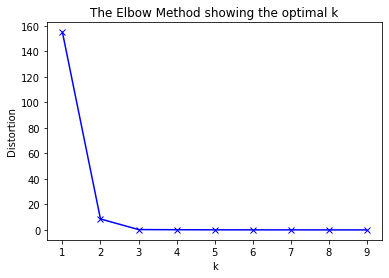

In [6]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
X = data
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
    

# Query 6.4
Prepare a separate Data frame to show which stocks belong to the same cluster

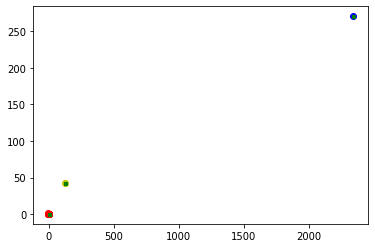

In [7]:
# computing K-Means with K = 3 (3 clusters)
centroids,_ = kmeans(X,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=3)

In [8]:
#identify the outlier
print(returns.idxmax())

Returns       Piramal
Volatility    Piramal
dtype: object


In [9]:
#drop the relevant stock from our data
returns.drop('Piramal',inplace=True)
#recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

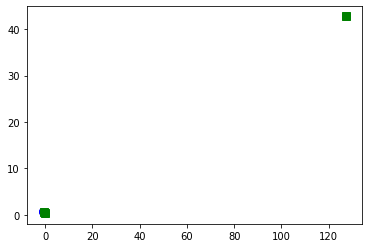

In [10]:
# computing K-Means with K = 3 (3 clusters)
centroids,_ = kmeans(data,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

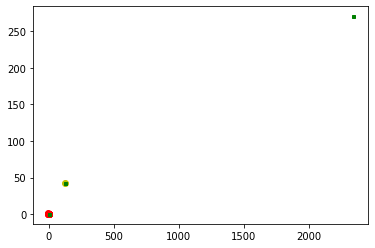

In [11]:
centroids,_ = kmeans(X,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=3)

In [12]:
#identify the outlier
print(returns.idxmax())

Returns       Manapuram
Volatility    Manapuram
dtype: object


In [13]:
#drop the relevant stock from our data
returns.drop('Manapuram',inplace=True)
#recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

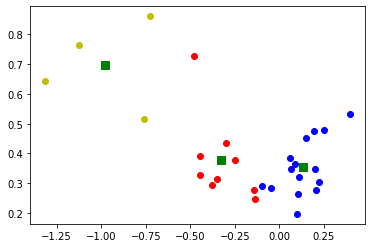

In [14]:
# computing K-Means with K = 3 (3 clusters)
centroids,_ = kmeans(data,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [15]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
for detail in details:
    print(detail)

('Airtel', 0)
('Bhel', 0)
('Cadila', 2)
('DLF', 0)
('Hdfc', 0)
('hdnzinc', 2)
('IDEA', 1)
('Msm', 1)
('ultracemo', 0)
('Boi', 0)
('Dishtv', 2)
('Escorts', 2)
('godrej', 2)
('Gujgas', 1)
('Pageinds', 2)
('Supreme', 0)
('Tatacomm', 0)
('Tatglobal', 0)
('Ubl', 0)
('cafin', 0)
('Capacite', 0)
('db_corp', 2)
('Program', 0)
('Ramcos', 2)
('Sunteck', 0)
('Time_Techno', 2)
('Welcorp', 0)
('Yes_Bank', 1)
